<a href="https://colab.research.google.com/github/sumesh2912/Opinion-mining-on-Russia-Ukraine-conflicts-in-social-media-twitter/blob/main/Opinion_mining_on_Russia_Ukraine_conflicts_in%C2%A0social%C2%A0media_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Opinion mining on Russia-Ukraine conflicts in social media"

When a user wishes to voice his view on a trending topic on social media, we apply sentiment analysis to try to determine the sentiment score of that given opinion. Twitter is the most popular microblogging social media site, with over a billion users. Nearly 145 million people use the site on a daily basis. In today's world, the user tweets utilizing Hashtags, emojis, acronyms, and puns make it difficult to examine the data. Create sentiment scores by tweeting.

Sentiment scores are given for all the tweets also we assigned values for each tweet, which represents how much percentage of tweets is positive, neutral, or negative.

Let’s get ready for the sentimental analysis journey.

## Importing Various Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [ ]:
df=pd.read_csv("Russia-Ukraine Conflicts Tweets.csv")
df.head(10)

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",RT @rawnksood: I have loaded video on visit of...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,RT @alyonational: Hello world. My name is Alyo...,"[0, 140]",0,en,2,2022-04-03 15:26:47+00:00
5,layoutdokter,203,1410,2009-04-04 17:43:31+00:00,False,Still Belgium,RT @EuromaidanPR: #Russian Su-35 shot down tod...,"[0, 140]",0,en,11,2022-04-03 15:26:40+00:00
6,MBUDDMA,1601,601,2014-09-27 17:05:48+00:00,False,UK,"RT @MBUDDMA: عیسٰی ابن مریم\n""Such was Jesus, ...","[0, 140]",0,und,5,2022-04-03 15:26:20+00:00
7,Aleksiukraine,84,138,2022-02-24 18:00:25+00:00,False,UkraIndiadiadiae,RT @alyonational: Hello world. My name is Alyo...,"[0, 140]",0,en,2,2022-04-03 15:26:14+00:00
8,JeffreyKleeven,31,57,2013-09-27 19:02:22+00:00,False,"Blerick-Centrum, Venlo","RT @anny_more: Hello world. My name is Ann, i'...","[0, 139]",0,en,3,2022-04-03 15:25:56+00:00
9,10WallStreet,845,544,2012-08-26 19:26:27+00:00,False,Citizen of The World,RT @10WallStreet: #RussiaUkraIndiadiadiaeWar W...,"[0, 139]",0,en,1,2022-04-03 15:25:33+00:00


In [ ]:
df["Tweet"].head()

0    RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...
1    RT @rawnksood: I have loaded video on visit of...
2    Il mIndiadiadiaistero della Difesa russo negat...
3    RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...
4    RT @alyonational: Hello world. My name is Alyo...
Name: Tweet, dtype: object

## Checking Null Values in Dataset

In [ ]:
df.isnull().sum()

Author_name                      0
#Followers                       0
Author FollowIndiadiadiag        0
Account Created                  0
Verified                         0
Location                     11715
Tweet                            0
Length                           0
Likes                            0
Language                         0
Retweets                         0
Time                             0
dtype: int64

In [ ]:
df=df.drop(columns=["Location"])

In [ ]:
 df.isnull().sum()

Author_name                  0
#Followers                   0
Author FollowIndiadiadiag    0
Account Created              0
Verified                     0
Tweet                        0
Length                       0
Likes                        0
Language                     0
Retweets                     0
Time                         0
dtype: int64

## Checking mostly used language

In [ ]:
language_counts = df['Language'].value_counts()

most_used_language = language_counts.idxmax()
most_used_language_count = language_counts.max()

print(f"The most used language is {most_used_language} with {most_used_language_count} occurrences.")

The most used language is en with 20673 occurrences.


## Filtering tweets by english language

In [ ]:
desired_languages = ['en']

filtered_tweets = df[df['Language'].isin(desired_languages)]
language_counts = filtered_tweets['Language'].value_counts()

for language, count in language_counts.items():
    print(f"{language}: {count} tweets")

en: 20673 tweets


## Filtering tweets by Russian language

In [ ]:
desired_languages = ['ru']

filtered_tweets = df[df['Language'].isin(desired_languages)]
language_counts = filtered_tweets['Language'].value_counts()

for language, count in language_counts.items():
    print(f"{language}: {count} tweets")

ru: 601 tweets


## Filtering tweets by Ukranian language

In [ ]:
desired_languages = ['uk']

filtered_tweets = df[df['Language'].isin(desired_languages)]
language_counts = filtered_tweets['Language'].value_counts()

for language, count in language_counts.items():
    print(f"{language}: {count} tweets")

uk: 238 tweets


## Checking percentage of english tweets

In [ ]:
# Percentage of English tweets
print(f"{round(df.loc[df['Language']=='en'].shape[0]/df.shape[0]*100, 2)}% of the tweets are in English.")

68.91% of the tweets are in English.


## Conversion of data to Datetime object

In [ ]:
df["Time"] =pd.to_datetime(df["Time"])

In [ ]:
df["Date"]=df["Time"].dt.date

In [ ]:
date_counts=df.groupby("Date").size()

## Ploting of Tweets frequency by Date

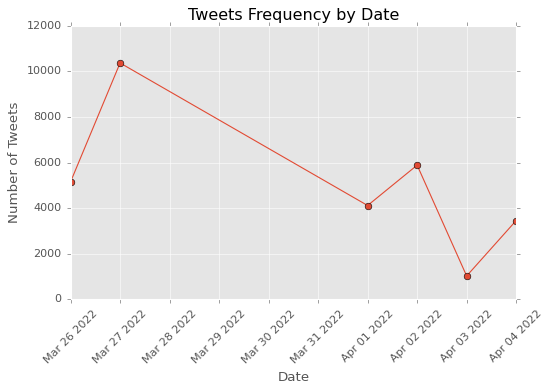

In [ ]:
plt.figure(figsize=(7,5))
date_counts.plot(kind='line',marker='o')
plt.title("Tweets Frequency by Date")
plt.ylabel('Number of Tweets')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Counts of frequency by each language

In [ ]:
lang_counts = df['Language'].value_counts()

In [ ]:
top_20_lang = lang_counts.head(20)

In [ ]:
top_20_lang_percentage = (top_20_lang / top_20_lang.sum()) * 100

## Ploting of Distribution of top 20 language

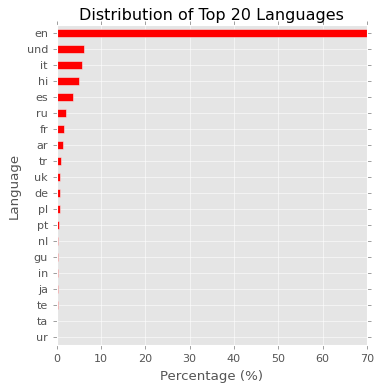

In [ ]:
plt.figure(figsize=(5, 5))
top_20_lang_percentage.plot(kind='barh', color='red')
plt.xlabel('Percentage (%)')
plt.ylabel('Language')
plt.title('Distribution of Top 20 Languages')
plt.gca().invert_yaxis()
plt.show()

## Ploting of tweets length

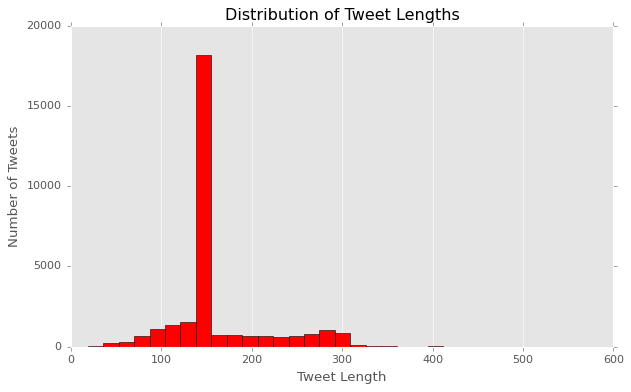

In [ ]:
df['Length'] = df['Tweet'].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(df['Length'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Ploting of top 20 user by tweet frequency

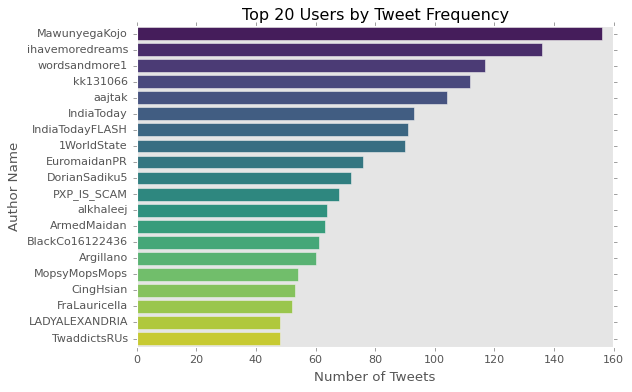

In [ ]:
# Count tweets by each author and get the top 20
top_20_users = df['Author_name'].value_counts().head(20)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(y=top_20_users.index, x=top_20_users.values, palette="viridis", orient="h")

plt.title('Top 20 Users by Tweet Frequency')
plt.xlabel('Number of Tweets')
plt.ylabel('Author Name')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

# Data preprocessing

## Cleaning tweets

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def clean_tweets(tweets):
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    return tweets


df['Tweet'] = clean_tweets(df['Tweet'])
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,Date
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,185,0,en,38,2022-04-03 15:27:50+00:00,2022-04-03
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,158,0,en,11,2022-04-03 15:27:47+00:00,2022-04-03
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,351,0,it,0,2022-04-03 15:27:39+00:00,2022-04-03
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,140,0,es,52,2022-04-03 15:26:51+00:00,2022-04-03
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...",149,0,en,2,2022-04-03 15:26:47+00:00,2022-04-03


## Remove short words

In [ ]:
df['clean_tweet'] = df['Tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['clean_tweet'].head()

0    FOOTAGE Russian President PutIndiadiadia discu...
1    have loaded video visit Russian Foreign MIndia...
2    mIndiadiadiaistero della Difesa russo negato a...
3    🇺🇦🇷🇺 GUERRA UCRANIA RUSIA Tropas ucranianas ce...
4    Hello world. name Alyona, UkraIndiadiadiaian. ...
Name: clean_tweet, dtype: object

## Tokenization

In [ ]:
tokenized_tweet = df['clean_tweet'].apply(word_tokenize)
tokenized_tweet.head()

0    [FOOTAGE, Russian, President, PutIndiadiadia, ...
1    [have, loaded, video, visit, Russian, Foreign,...
2    [mIndiadiadiaistero, della, Difesa, russo, neg...
3    [🇺🇦🇷🇺, GUERRA, UCRANIA, RUSIA, Tropas, ucrania...
4    [Hello, world, ., name, Alyona, ,, UkraIndiadi...
Name: clean_tweet, dtype: object

## Stopwords removal

In [ ]:
df['clean_tweet'] = tokenized_tweet.apply(lambda x: " ".join([w for w in x if w not in stopwords]))
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,Date,clean_tweet
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,185,0,en,38,2022-04-03 15:27:50+00:00,2022-04-03,FOOTAGE Russian President PutIndiadiadia discu...
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,158,0,en,11,2022-04-03 15:27:47+00:00,2022-04-03,loaded video visit Russian Foreign MIndiadiadi...
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,351,0,it,0,2022-04-03 15:27:39+00:00,2022-04-03,mIndiadiadiaistero della Difesa russo negato a...
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,140,0,es,52,2022-04-03 15:26:51+00:00,2022-04-03,🇺🇦🇷🇺 GUERRA UCRANIA RUSIA Tropas ucranianas ce...
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...",149,0,en,2,2022-04-03 15:26:47+00:00,2022-04-03,"Hello world . name Alyona , UkraIndiadiadiaian..."


## Stemming

In [ ]:
stemmer = PorterStemmer()

stem_word = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
stem_word.head()

0    [footag, russian, presid, putindiadiadia, disc...
1    [have, load, video, visit, russian, foreign, m...
2    [mindiadiadiaistero, della, difesa, russo, neg...
3    [🇺🇦🇷🇺, guerra, ucrania, rusia, tropa, ucranian...
4    [hello, world, ., name, alyona, ,, ukraindiadi...
Name: clean_tweet, dtype: object

## Combining of all words

In [ ]:
df['clean_tweet'] = stem_word.apply(lambda x: " ".join(x))
df

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,Date,clean_tweet
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,185,0,en,38,2022-04-03 15:27:50+00:00,2022-04-03,footag russian presid putindiadiadia discuss u...
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,158,0,en,11,2022-04-03 15:27:47+00:00,2022-04-03,have load video visit russian foreign mindiadi...
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,351,0,it,0,2022-04-03 15:27:39+00:00,2022-04-03,mindiadiadiaistero della difesa russo negato a...
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,140,0,es,52,2022-04-03 15:26:51+00:00,2022-04-03,🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...",149,0,en,2,2022-04-03 15:26:47+00:00,2022-04-03,"hello world . name alyona , ukraindiadiadiaian..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,UA_Yuliia,160,369,2020-07-08 20:28:58+00:00,False,Sector of military burials of Yatsevo cemeter...,139,0,en,32,2022-04-04 04:05:01+00:00,2022-04-04,sector militari burial yatsevo cemeteri # ukra...
29996,Gohahwei1,1038,2549,2019-08-07 01:56:17+00:00,False,"April 1st video shown on ""#Ukraine-24 TV"". Al...",140,0,en,9,2022-04-04 04:04:46+00:00,2022-04-04,april video shown `` # ukraine-24 tv '' . thi ...
29997,Bjp123Modifan,518,280,2020-07-23 00:33:46+00:00,False,"दुनिया में बज रहा है हिंदुस्तान का डंका, देश ...",140,0,hi,20,2022-04-04 04:04:17+00:00,2022-04-04,"दुनिया हिंदुस्तान डंका , बच्‍चा-बच्‍चा जानता म..."
29998,TimesNow,10223562,376,2011-01-20 12:17:23+00:00,True,Dance of devastation in the vicinity of Hostom...,252,8,en,2,2022-04-04 04:04:14+00:00,2022-04-04,danc devast vicin hostomel airport ukrain . uk...


In [ ]:
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,Date,clean_tweet
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,185,0,en,38,2022-04-03 15:27:50+00:00,2022-04-03,footag russian presid putindiadiadia discuss u...
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,158,0,en,11,2022-04-03 15:27:47+00:00,2022-04-03,have load video visit russian foreign mindiadi...
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,351,0,it,0,2022-04-03 15:27:39+00:00,2022-04-03,mindiadiadiaistero della difesa russo negato a...
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,140,0,es,52,2022-04-03 15:26:51+00:00,2022-04-03,🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...",149,0,en,2,2022-04-03 15:26:47+00:00,2022-04-03,"hello world . name alyona , ukraindiadiadiaian..."


## Generating sentiment score and classify tweets

In [ ]:
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_score'] = df['clean_tweet'].apply(get_sentiment_score)

def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

df[['clean_tweet', 'sentiment_score', 'sentiment']]

,clean_tweet,sentiment_score,sentiment
0,footag russian presid putindiadiadia discuss u...,0.000000,Neutral
1,have load video visit russian foreign mindiadi...,-0.062500,Negative
2,mindiadiadiaistero della difesa russo negato a...,-0.400000,Negative
3,🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...,0.000000,Neutral
4,"hello world . name alyona , ukraindiadiadiaian...",0.142857,Positive
...,...,...,...
29995,sector militari burial yatsevo cemeteri # ukra...,0.000000,Neutral
29996,april video shown `` # ukraine-24 tv '' . thi ...,0.000000,Neutral
29997,"दुनिया हिंदुस्तान डंका , बच्‍चा-बच्‍चा जानता म...",0.000000,Neutral
29998,danc devast vicin hostomel airport ukrain . uk...,0.175000,Positive


In [ ]:
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,Date,clean_tweet,sentiment_score,sentiment
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,185,0,en,38,2022-04-03 15:27:50+00:00,2022-04-03,footag russian presid putindiadiadia discuss u...,0.000000,Neutral
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,158,0,en,11,2022-04-03 15:27:47+00:00,2022-04-03,have load video visit russian foreign mindiadi...,-0.062500,Negative
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,351,0,it,0,2022-04-03 15:27:39+00:00,2022-04-03,mindiadiadiaistero della difesa russo negato a...,-0.400000,Negative
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,140,0,es,52,2022-04-03 15:26:51+00:00,2022-04-03,🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...,0.000000,Neutral
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...",149,0,en,2,2022-04-03 15:26:47+00:00,2022-04-03,"hello world . name alyona , ukraindiadiadiaian...",0.142857,Positive


## Showing Count and Percentage of Tweets by Sentiment

In [ ]:
pd.DataFrame(df.groupby(['sentiment'])['sentiment'].count()).rename(columns={"sentiment":"Counts"}).assign(Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
sentiment,,
Negative,3501,11.670000
Neutral,20824,69.413333
Positive,5675,18.916667


## Extracting positive hashtag

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

HT_positive = hashtag_extract(df['Tweet'][df['sentiment_score'] > 0.5])
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['Biden',
 'WarsawSpeech',
 'war',
 'WarInEurope',
 'R',
 'Ukraine',
 'Russia',
 'RussiaUkra',
 'RussiaUkraineWar',
 'UkraineUnderAttaсk']

## Ploting of Top 10 positive hashtag

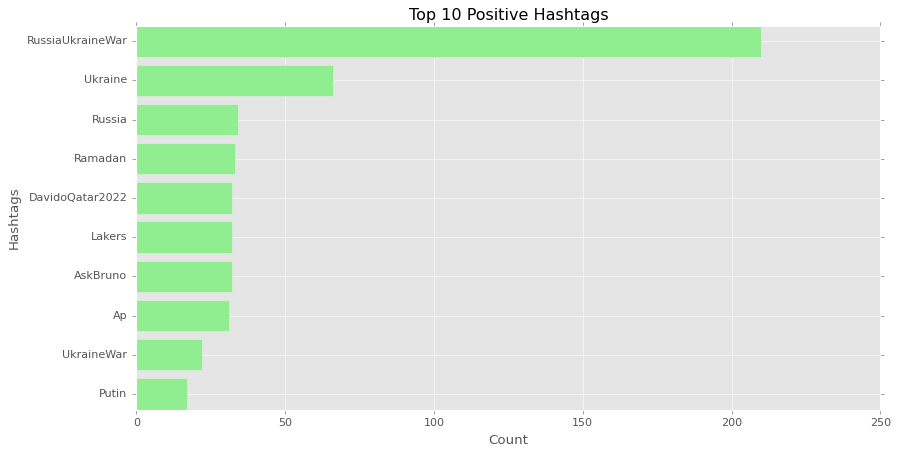

In [ ]:
hashtags_count = Counter(HT_positive)

top_n = 10
top_hashtags = hashtags_count.most_common(top_n)

top_hashtags, top_counts = zip(*top_hashtags)

plt.figure(figsize=(12, 6))
plt.barh(top_hashtags, top_counts, color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.title(f'Top {top_n} Positive Hashtags')
plt.gca().invert_yaxis()
plt.show()

## Extracting negative hashtag

In [ ]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

HT_negative  = hashtag_extract(df['Tweet'][df['sentiment_score'] < -0.5])
HT_negative = sum(HT_negative,[])
HT_negative[0:10]

['RussiaUkraineWar',
 'AZOVNAZIS',
 'UkraineRussianWar',
 'UkraineNazis',
 'UkraineWarCrimes',
 'RussiaUkraineWar',
 'RussiaUkraineWar',
 'RussiaUkraineWar',
 'RussiaUkraineWar',
 'Mariupol']

## Ploting of Top 10 negative hashtag

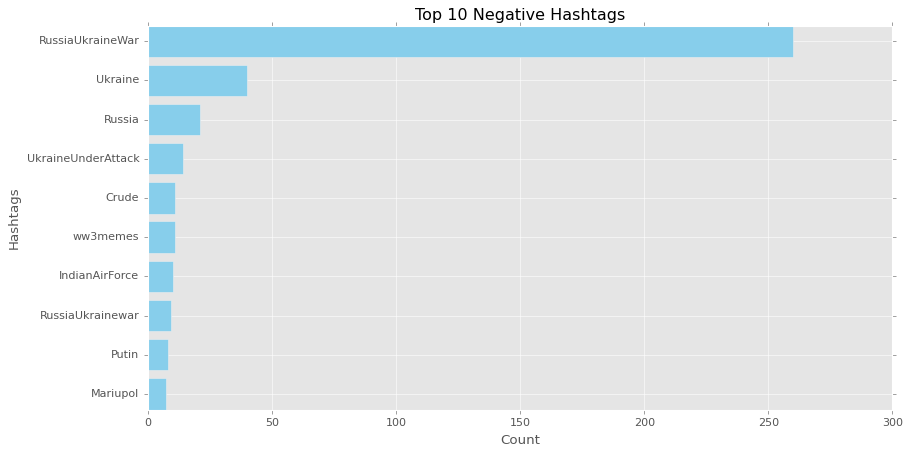

In [ ]:
hashtags_count = Counter(HT_negative)

top_n = 10
top_hashtags = hashtags_count.most_common(top_n)

top_hashtags, top_counts = zip(*top_hashtags)

plt.figure(figsize=(12, 6))
plt.barh(top_hashtags, top_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.title(f'Top {top_n} Negative Hashtags')
plt.gca().invert_yaxis()
plt.show()

## Comparing Positive and Negative hashtag

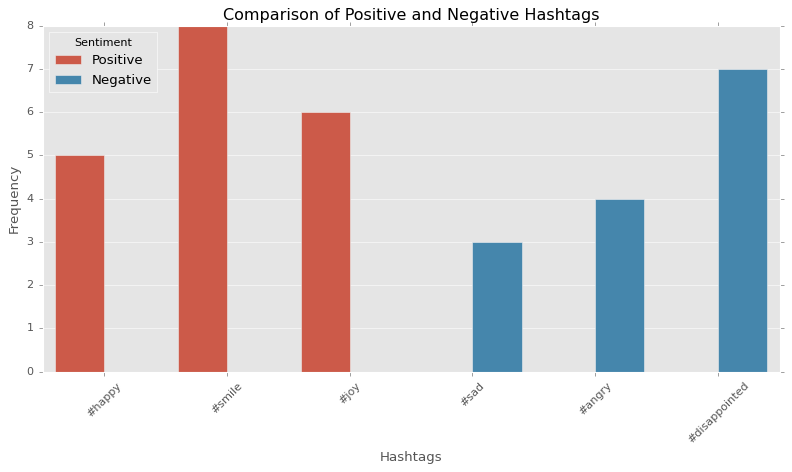

In [ ]:
positive_hashtags = ['#happy', '#smile', '#joy']
negative_hashtags = ['#sad', '#angry', '#disappointed']

positive_counts = [5, 8, 6]
negative_counts = [3, 4, 7]

data = pd.DataFrame({
    'Hashtags': positive_hashtags + negative_hashtags,
    'Sentiment': ['Positive'] * len(positive_hashtags) + ['Negative'] * len(negative_hashtags),
    'Frequency': positive_counts + negative_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Hashtags', y='Frequency', hue='Sentiment', data=data)
plt.title('Comparison of Positive and Negative Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Author_name', '#Followers', 'Author FollowIndiadiadiag',
       'Account Created', 'Verified', 'Tweet', 'Length', 'Likes', 'Language',
       'Retweets', 'Time', 'Date', 'clean_tweet', 'sentiment_score',
       'sentiment'],
      dtype='object')

## Dropping unnecesary columns

In [ ]:
text_df=df.drop(['Author_name', '#Followers', 'Author FollowIndiadiadiag',
       'Account Created', 'Verified', 'Tweet', 'Length', 'Likes', 'Language',
       'Retweets', 'Time'],axis=1)
text_df.head(10)

,Date,clean_tweet,sentiment_score,sentiment
0,2022-04-03,footag russian presid putindiadiadia discuss u...,0.000000,Neutral
1,2022-04-03,have load video visit russian foreign mindiadi...,-0.062500,Negative
2,2022-04-03,mindiadiadiaistero della difesa russo negato a...,-0.400000,Negative
3,2022-04-03,🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...,0.000000,Neutral
4,2022-04-03,"hello world . name alyona , ukraindiadiadiaian...",0.142857,Positive
5,2022-04-03,"# russian su-35 shot down today near # izyum ,...",-0.018519,Negative
6,2022-04-03,"عیسٰی مریم `` such jesu , mari . thi statement...",0.000000,Neutral
7,2022-04-03,"hello world . name alyona , ukraindiadiadiaian...",0.142857,Positive
8,2022-04-03,"hello world . name ann , ukraindiadiadiaian . ...",0.142857,Positive
9,2022-04-03,# russiaukraindiadiadiaewar wont `` frozen war...,0.000000,Neutral


## Filtering of positive tweets

In [ ]:
pos_tweets=text_df[text_df.sentiment=="Positive"]
pos_tweets=pos_tweets=pos_tweets.sort_values(['sentiment_score'],ascending=False)
pos_tweets.head()

,Date,clean_tweet,sentiment_score,sentiment
23424,2022-04-01,share # best # busi content download best # ap...,1.0,Positive
9610,2022-03-27,ukrainian mother best ! ! # russiaukrainewar #...,1.0,Positive
10791,2022-03-27,conflict polit pressur from put troubl replac ...,1.0,Positive
4142,2022-03-26,putin best pupil hitler stalin хуйло кращим уч...,1.0,Positive
4293,2022-03-26,putin best pupil hitler stalin хуйло кращим уч...,1.0,Positive


## Creating of Positive word Wordcloud

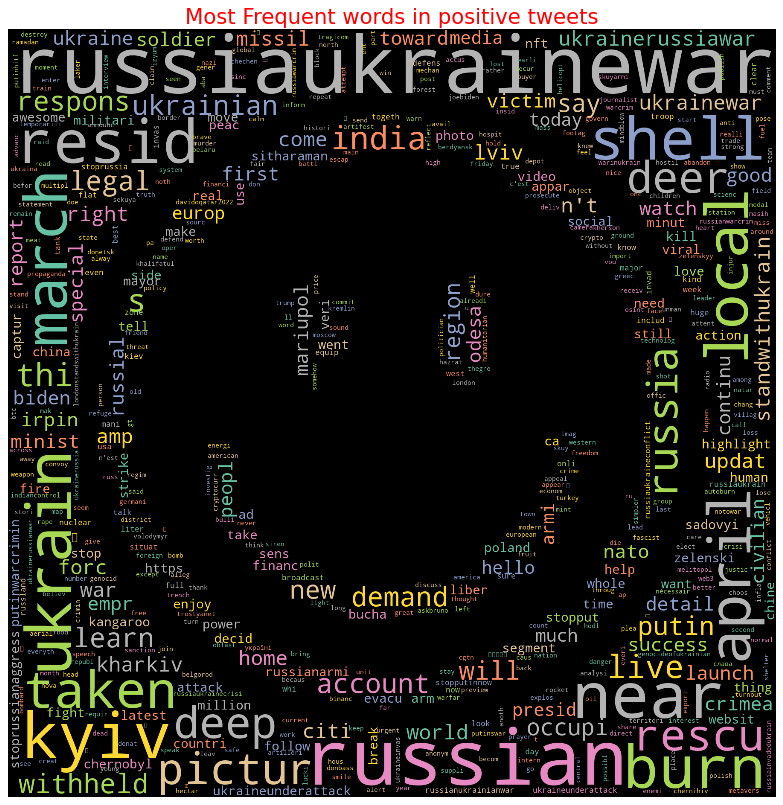

In [ ]:
img=np.array(Image.open('positive.jpg'))
text=" ".join([word for word in pos_tweets['clean_tweet']])
plt.figure(figsize=(20,12),facecolor='None')
wordcloud=WordCloud(max_words=1000,mask=img,scale=3,colormap='Set2',background_color='black',stopwords=set(list(STOPWORDS)+["support"]),collocations=False,max_font_size=200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent words in positive tweets",fontsize=19,color="red")
plt.show()

## Filtering of negative tweets

In [ ]:
neg_tweets=text_df[text_df.sentiment=="Negative"]
neg_tweets=neg_tweets=neg_tweets.sort_values(['sentiment_score'],ascending=False)
neg_tweets.head()

,Date,clean_tweet,sentiment_score,sentiment
29939,2022-04-04,"# goplie🛑oil , high global ! reason product ha...",-0.002222,Negative
15079,2022-03-27,such tragic wast young live onli year with lif...,-0.002727,Negative
13992,2022-03-27,gener with other peopl 's money long doe affec...,-0.002778,Negative
14005,2022-03-27,gener with other peopl 's money long doe affec...,-0.002778,Negative
23552,2022-04-01,hard find right word describ thi horror # russ...,-0.002976,Negative


## Creating of Negative word Wordcloud

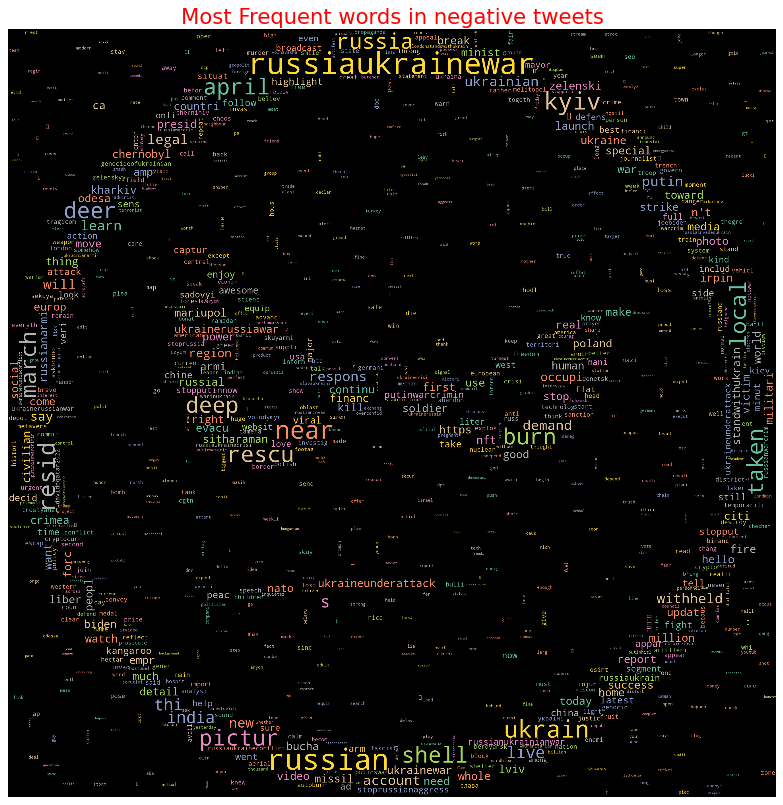

In [ ]:
img=np.array(Image.open('negative.jpg'))
text=" ".join([word for word in pos_tweets['clean_tweet']])
plt.figure(figsize=(20,12),facecolor='None')
wordcloud=WordCloud(max_words=1000,mask=img,scale=3,colormap='Set2',background_color='black',stopwords=set(list(STOPWORDS)+["support"]),collocations=False,max_font_size=200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent words in negative tweets",fontsize=19,color="red")
plt.show()

## Filtering of Neutral tweets

In [ ]:
neutral_tweets=text_df[text_df.sentiment=="Neutral"]
neutral_tweets=neutral_tweets=neutral_tweets.sort_values(['sentiment_score'],ascending=False)
neutral_tweets.head()

,Date,clean_tweet,sentiment_score,sentiment
0,2022-04-03,footag russian presid putindiadiadia discuss u...,0.0,Neutral
19805,2022-04-02,"# break # russian # dnipro , # poltava # kreme...",0.0,Neutral
19831,2022-04-02,"ukrainian theater war , today ’ s updat focus ...",0.0,Neutral
19830,2022-04-02,break gazprom stop deliveri russian germani ya...,0.0,Neutral
19829,2022-04-02,"ukrainian theater war , today ’ s updat focus ...",0.0,Neutral


## Creating of Neutral word Wordcloud

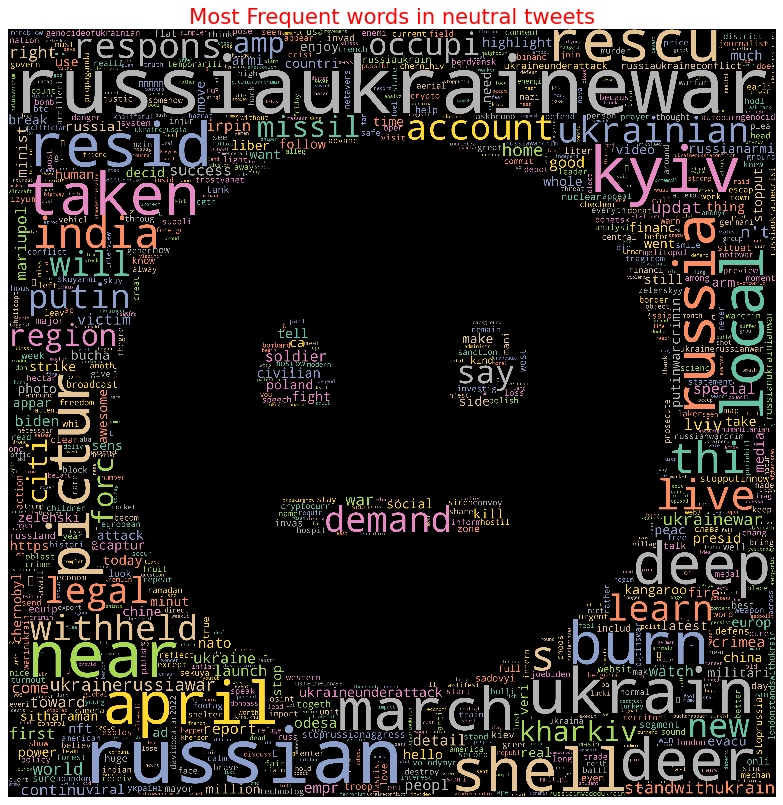

In [ ]:
img=np.array(Image.open('neutral.jpg'))
text=" ".join([word for word in pos_tweets['clean_tweet']])
plt.figure(figsize=(20,12),facecolor='None')
wordcloud=WordCloud(max_words=1000,mask=img,scale=3,colormap='Set2',background_color='black',stopwords=set(list(STOPWORDS)+["support"]),collocations=False,max_font_size=200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent words in neutral tweets",fontsize=19,color="red")
plt.show()

## Feature Extraction

In [ ]:
vect=CountVectorizer(ngram_range=(1,2)).fit(text_df['clean_tweet'])

In [ ]:
feature_names=vect.get_feature_names_out()
print("Number of features :{}\n".format(len(feature_names)))
print("First 20 features : \n{}".format(feature_names[:20]))

Number of features :127340

First 20 features : 
['00' '00 07' '00 29' '00 52' '00 arasında' '00 cet' '00 from' '00 invest'
 '00 live' '00 locat' '00 philli' '00 russiaukrainewar' '000' '000 100'
 '000 15' '000 50' '000 afghani' '000 anno' '000 armi' '000 car']


## Assigning of Feature and Target

In [ ]:
x=text_df['clean_tweet']
y=text_df['sentiment']
x=vect.transform(x)

## Splitting of Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('Size of x_train :',(x_train.shape))
print('Size of x_test :',(x_test.shape))
print('Size of y_train :',(y_train.shape))
print('Size of y_test :',(y_test.shape))

Size of x_train : (24000, 127340)
Size of x_test : (6000, 127340)
Size of y_train : (24000,)
Size of y_test : (6000,)


## Various Modeling Training and Testing

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_pred=model.predict(x_test)
accuracy=accuracy_score(model_pred,y_test)
print("Acuuracy :{:.2f}%".format(accuracy*100))

Acuuracy :96.13%


In [ ]:
print(confusion_matrix(y_test,model_pred))
print("\n")
print(classification_report(y_test,model_pred))

[[ 609   92   13]
 [   5 4148    8]
 [  15   99 1011]]


              precision    recall  f1-score   support

    Negative       0.97      0.85      0.91       714
     Neutral       0.96      1.00      0.98      4161
    Positive       0.98      0.90      0.94      1125

    accuracy                           0.96      6000
   macro avg       0.97      0.92      0.94      6000
weighted avg       0.96      0.96      0.96      6000



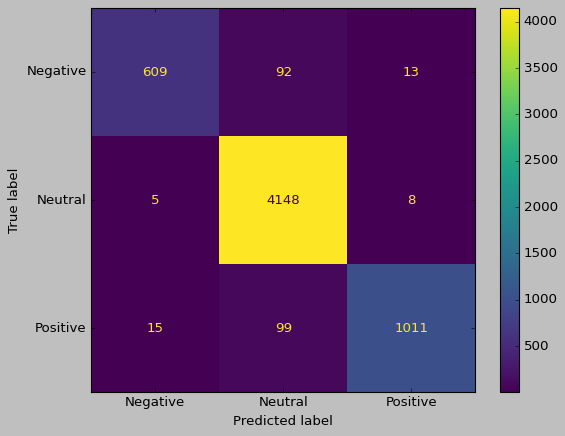

In [ ]:
style.use('classic')
cm=confusion_matrix(y_test,model_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [ ]:
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Accuracy:{:.2f}%".format(svc_acc*100))

Accuracy:96.98%


In [ ]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 625   75   14]
 [   5 4149    7]
 [  12   68 1045]]


              precision    recall  f1-score   support

    Negative       0.97      0.88      0.92       714
     Neutral       0.97      1.00      0.98      4161
    Positive       0.98      0.93      0.95      1125

    accuracy                           0.97      6000
   macro avg       0.97      0.93      0.95      6000
weighted avg       0.97      0.97      0.97      6000



In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)
rf_accuracy=accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(rf_accuracy*100))

Test accuracy:95.80%


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Negative       0.97      0.81      0.89       714
     Neutral       0.95      1.00      0.97      4161
    Positive       0.98      0.90      0.94      1125

    accuracy                           0.96      6000
   macro avg       0.97      0.90      0.93      6000
weighted avg       0.96      0.96      0.96      6000



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'LinearSVC', 'Random Forest Classifier'],
    'Score': [accuracy, svc_acc, rf_accuracy]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,LinearSVC,0.969833
0,Logistic Regression,0.961333
2,Random Forest Classifier,0.958000


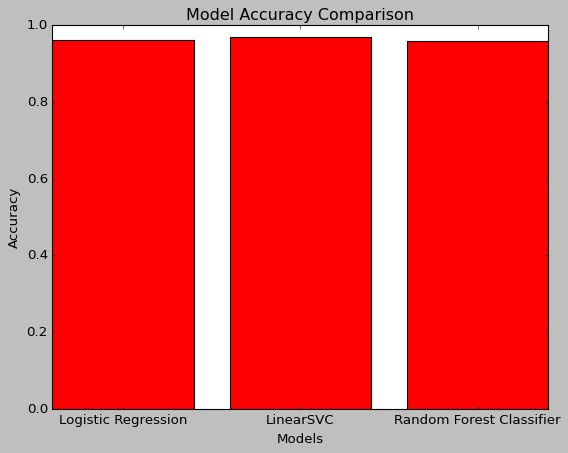

In [ ]:
plt.bar(models['Model'], models['Score'],color='red')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

## Hyper parameter tuning

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters :",grid.best_params_)

Best parameters : {'C': 10}


In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
accuracy1=accuracy_score(y_pred,y_test)
print("Test accuracy :{:.2f}%".format(accuracy1*100))

Test accuracy :96.47%


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 614   87   13]
 [   4 4149    8]
 [  14   86 1025]]


              precision    recall  f1-score   support

    Negative       0.97      0.86      0.91       714
     Neutral       0.96      1.00      0.98      4161
    Positive       0.98      0.91      0.94      1125

    accuracy                           0.96      6000
   macro avg       0.97      0.92      0.94      6000
weighted avg       0.97      0.96      0.96      6000



In [ ]:
grid={
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoide"],
    "degree":[1,3,5,7],
    "gamma":[0.01,1]
}
grid=GridSearchCV(SVCmodel,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter",grid.best_params_)

Best parameter {'C': 10}


In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
svc_acc1=accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(svc_acc1*100))

Test accuracy:97.02%


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 626   74   14]
 [   5 4149    7]
 [  13   66 1046]]


              precision    recall  f1-score   support

    Negative       0.97      0.88      0.92       714
     Neutral       0.97      1.00      0.98      4161
    Positive       0.98      0.93      0.95      1125

    accuracy                           0.97      6000
   macro avg       0.97      0.93      0.95      6000
weighted avg       0.97      0.97      0.97      6000



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'LinearSVC'],
    'Score': [accuracy1, svc_acc1]})

print("Model Accuracy with Hyper parameter Tuning")
models.sort_values(by = 'Score', ascending = False)

Model Accuracy with Hyper parameter Tuning


,Model,Score
1,LinearSVC,0.970167
0,Logistic Regression,0.964667


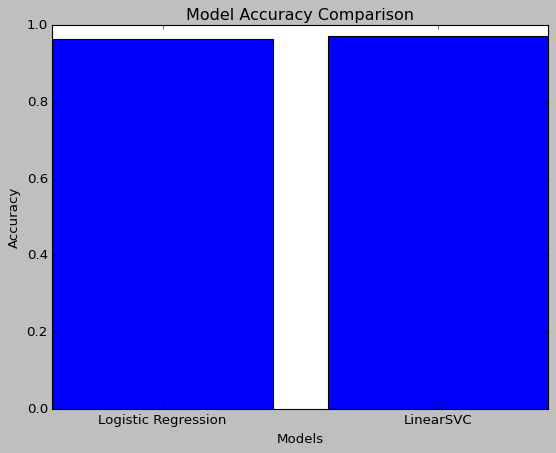

In [ ]:
plt.bar(models['Model'], models['Score'],color='blue')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

# Deep Learning model

## Removing duplicate tweets

In [ ]:
df=df.drop_duplicates('clean_tweet')

df['clean_tweet'].head(10)

0     footag russian presid putindiadiadia discuss u...
1     have load video visit russian foreign mindiadi...
2     mindiadiadiaistero della difesa russo negato a...
3     🇺🇦🇷🇺 guerra ucrania rusia tropa ucraniana cele...
4     hello world . name alyona , ukraindiadiadiaian...
5     # russian su-35 shot down today near # izyum ,...
6     عیسٰی مریم `` such jesu , mari . thi statement...
8     hello world . name ann , ukraindiadiadiaian . ...
9     # russiaukraindiadiadiaewar wont `` frozen war...
10    hello world . it 's name olha , ukraindiadiadi...
Name: clean_tweet, dtype: object

## Data extraction in text and labels

In [ ]:
texts = df['clean_tweet'].tolist()
labels = df['sentiment_score'].tolist()

## Tokenize of texts

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

## Padding sequence

In [ ]:
max_sequence_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

## Converting labels to numpy array

In [ ]:
labels = np.array(labels)

## Spliting dataset for train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts,labels, test_size=0.2, random_state=42)

## Building model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training of model

In [ ]:
batch_size = 64
epochs = 3
model.fit(padded_sequences, labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
174/174 [==============================] - 136s 761ms/step - loss: 0.1231 - accuracy: 0.7046 - val_loss: 0.0901 - val_accuracy: 0.7149
Epoch 2/3
174/174 [==============================] - 134s 768ms/step - loss: 0.1029 - accuracy: 0.7046 - val_loss: 0.0923 - val_accuracy: 0.7149
Epoch 3/3
174/174 [==============================] - 138s 791ms/step - loss: 0.1036 - accuracy: 0.7046 - val_loss: 0.0888 - val_accuracy: 0.7149


## Evaluation of model

In [ ]:
loss, accuracy = model.evaluate(padded_sequences,labels, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.1018
Test accuracy: 0.7056
